In [329]:
import numpy as np
import requests
import lxml.html as l
import os
import time

In [330]:
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 11.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1",
    "Sec-Fetch-Dest": "document",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-Site": "none",
    "Sec-Fetch-User": "?1",
    "Cache-Control": "max-age=0",
}

In [331]:
start = "data/htmls/"
links = ["https://stickers.wiki/ru/telegram/ashyteytayt/"
        , "https://stickers.wiki/ru/telegram/genshinchibi_official/"
        , "https://stickers.wiki/ru/telegram/genshinchibigreysunders/"
        , "https://stickers.wiki/ru/telegram/genshin_impact_official_chibi/"
        , "https://stickers.wiki/ru/telegram/a1331813402_by_erruuu_gi/"
        , "https://stickers.wiki/ru/telegram/paimonpainting7to13_by_stickersthiefbot/"]

def save_raw_html(html_link: str):
    bool = True
    attempt = 0
    name_folder = html_link.split("/")[-2]
    print(name_folder, "start save")
    while bool and attempt < 10:
        bool = False
        print("saving...")
        try:
            r = requests.get(html_link, headers=HEADERS)
            if r.status_code != 200:
                bool = True
                attempt += 1
                continue
            time.sleep(3)
            write = r.text.replace('xlink:', '')
            # print(write)
            # print(r.text)
            if(len(write) < 10):
                bool = True
                attempt += 1
                continue
            f = open(start + name_folder + ".html", 'w', encoding="utf-8")
            f.write(write)
            f.close()
            print("succesful save")
        except:
            print("exeption while saving")
            attempt += 1
            bool = True

In [332]:
for link in links:
    save_raw_html(link)

ashyteytayt start save
saving...
succesful save
genshinchibi_official start save
saving...
succesful save
genshinchibigreysunders start save
saving...
succesful save
genshin_impact_official_chibi start save
saving...
succesful save
a1331813402_by_erruuu_gi start save
saving...
succesful save
paimonpainting7to13_by_stickersthiefbot start save
saving...
succesful save


In [333]:
def clone(element):
    return l.etree.fromstring(l.etree.tostring(element))

In [334]:
def get_pics(page_name):
    list = []
    source = open(start + page_name + ".html", encoding="utf-8").read()
    try:
        root = l.fromstring(source)
        # <div class="mt-6 grid grid-cols-2 gap-3 sm:grid-cols-5 sm:gap-4">
        all_pics = root.xpath("//div[@class='mt-6 grid grid-cols-2 gap-3 sm:grid-cols-5 sm:gap-4']")[0]
        # print(all_pics)
        for div_pic in all_pics:
            # print(clone(clone(div_pic)[0]).attrib["src"])
            list.append(clone(clone(div_pic)[0]).attrib["src"])
    except:
        print("can't download from", start + page_name)
    return list

In [335]:
from itertools import chain

all_pics = []
for link in links:
    name = link.split("/")[-2]
    # print(name)
    all_pics.append(get_pics(name))
all_pics = list(chain.from_iterable(all_pics))
print(len(all_pics))

651


In [336]:
from PIL import Image
import tempfile


def convert_webp_to_png(input_path, output_path):
    try:
        img = Image.open(input_path)
        img.save(output_path, 'PNG')
        print(f"Изображение успешно сконвертировано в PNG: {output_path}")
    except Exception as e:
        print(f"Ошибка при конвертации изображения: {e}")


def get_pic(num_from:int, num_to:int, list_pics):
    count = num_from
    for i in range(num_from, num_to):
        link = list_pics[i]
        r = requests.get(link, headers=HEADERS)
        time.sleep(0.1)
        if r.status_code == 200:
            # with open(save_pics + str(count) + ".png", 'wb') as file:
            #     file.write(r.content)
            webp_file_name = "transparent_image.webp"
            with open(webp_file_name, "wb") as file:
                file.write(r.content)
                convert_webp_to_png(file.name, save_pics + str(count) + ".png")
            os.remove(webp_file_name)
            print("Изображение успешно сохранено", count)
            count += 1
        else:
            print("Не удалось загрузить изображение.")

In [337]:
save_pics = "data/genshin_pics/"
get_pic(0, len(all_pics), all_pics)

Изображение успешно сконвертировано в PNG: data/genshin_pics/0.png
Изображение успешно сохранено 0
Изображение успешно сконвертировано в PNG: data/genshin_pics/1.png
Изображение успешно сохранено 1
Изображение успешно сконвертировано в PNG: data/genshin_pics/2.png
Изображение успешно сохранено 2
Изображение успешно сконвертировано в PNG: data/genshin_pics/3.png
Изображение успешно сохранено 3
Изображение успешно сконвертировано в PNG: data/genshin_pics/4.png
Изображение успешно сохранено 4
Изображение успешно сконвертировано в PNG: data/genshin_pics/5.png
Изображение успешно сохранено 5
Изображение успешно сконвертировано в PNG: data/genshin_pics/6.png
Изображение успешно сохранено 6
Изображение успешно сконвертировано в PNG: data/genshin_pics/7.png
Изображение успешно сохранено 7
Изображение успешно сконвертировано в PNG: data/genshin_pics/8.png
Изображение успешно сохранено 8
Изображение успешно сконвертировано в PNG: data/genshin_pics/9.png
Изображение успешно сохранено 9
Изображени

In [338]:
import os
from PIL import Image
import imagehash

def compute_hash(image_path):
    return imagehash.average_hash(Image.open(image_path))

hashes = {}

for filename in os.listdir(save_pics):
    if filename.endswith(".png"):
        image_path = os.path.join(save_pics, filename)
        image_hash = compute_hash(image_path)
        
        if image_hash in hashes:
            os.remove(image_path)
            print(f"Дубликат удален: {filename}")
        else:
            hashes[image_hash] = image_path

print("Процесс удаления дубликатов завершен.")

Дубликат удален: 25.png
Дубликат удален: 320.png
Дубликат удален: 322.png
Дубликат удален: 323.png
Дубликат удален: 347.png
Дубликат удален: 348.png
Дубликат удален: 349.png
Дубликат удален: 350.png
Дубликат удален: 365.png
Дубликат удален: 366.png
Дубликат удален: 367.png
Дубликат удален: 368.png
Дубликат удален: 369.png
Дубликат удален: 370.png
Дубликат удален: 373.png
Дубликат удален: 374.png
Дубликат удален: 375.png
Дубликат удален: 386.png
Дубликат удален: 387.png
Дубликат удален: 388.png
Дубликат удален: 389.png
Дубликат удален: 394.png
Дубликат удален: 396.png
Дубликат удален: 397.png
Дубликат удален: 443.png
Дубликат удален: 444.png
Дубликат удален: 445.png
Дубликат удален: 476.png
Дубликат удален: 477.png
Дубликат удален: 481.png
Дубликат удален: 489.png
Дубликат удален: 490.png
Дубликат удален: 499.png
Дубликат удален: 501.png
Дубликат удален: 518.png
Дубликат удален: 543.png
Дубликат удален: 56.png
Дубликат удален: 66.png
Процесс удаления дубликатов завершен.


In [339]:
import shutil
from IPython.display import display, Image


need_separate = False
def sort_fun(filename):
    return int(filename.split('.')[0])
def separate_pics():
    classes = []
    files = os.listdir(save_pics)
    files.sort(key=sort_fun)
    for filename in files:
        if filename.endswith(".png"):
            image_path = os.path.join(save_pics, filename)
            display(Image(filename=image_path))
            type = "0"
            while True:
                type = input()
                if type == '':
                    continue
                if int(type) == 0 or int(type) == 1 or int(type) == 2:
                    break
                else:
                    print("wrong class")
                    continue
            classes.append(int(type))
    return classes
classes = None
if need_separate:
    classes = separate_pics()
    print(classes)


need_separate = False

In [340]:
default_classes = [1,1,1,1,2,2,2,2,1,1,1,1,1,1,1,1,2,2,2,2,2,
                   2,2,2,2,0,0,0,2,2,1,1,0,2,2,1,1,2,1,1,1,2,
                   2,1,1,2,2,2,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,
                   1,1,2,2,2,2,1,1,2,1,1,2,2,2,2,2,1,1,2,1,1,
                   2,1,1,1,1,2,1,2,1,1,1,1,1,1,2,2,2,2,2,2,2,
                   2,2,2,2,1,1,1,0,0,1,1,1,1,1,1,1,1,2,2,2,2,
                   2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                   1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                   1,1,1,1,2,2,2,2,2,2,2,2,0,0,1,1,1,1,1,1,1,
                   1,2,2,2,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,
                   0,2,2,2,2,0,1,1,1,1,1,2,2,2,2,0,2,2,2,2,0,
                   1,1,1,1,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,
                   1,1,2,2,1,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,
                   1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,1,1,1,1,
                   1,2,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,
                   1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,
                   1,1,1,1,1,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,
                   1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                   2,2,2,2,2,2,2,2,2,2,0,0,0,0,1,1,1,1,1,1,1,
                   1,1,1,1,1,1,1,1,2,1,2,1,2,0,2,2,2,1,1,1,1,
                   1,0,0,0,0,2,2,0,1,2,1,1,1,1,1,1,1,1,1,1,1,
                   1,1,1,1,2,1,1,2,2,2,1,2,2,2,1,1,2,2,2,2,1,
                   1,1,1,2,2,2,2,0,0,0,0,2,2,1,0,0,1,0,1,1,1,
                   1,1,1,1,1,2,0,2,0,0,0,2,2,2,2,1,1,0,2,2,2,
                   2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                   1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                   1,2,2,1,2,2,2,2,2,2,2,2,1,1,1,0,0,1,1,2,2,
                   2,2,1,2,1,2,1,2,2,2,2,2,0,0,1,1,1,1,1,1,1,
                   1,2,2,2,2,1,1,0,0,1,1,1,1,1,1,1,1,1,1,2,1,
                   1,2,1,2]

In [341]:
# ind = 0
if(classes == None):
    classes = default_classes
# files = os.listdir(save_pics)
# files.sort(key=sort_fun)
# for filename in files:
#     if filename.endswith(".png"):
#         image_path = os.path.join(save_pics, filename)
#         img = PILImage.open(image_path)
#         display(Image(filename=image_path))
#         print(classes[ind])
#         ind += 1

In [342]:
files = os.listdir(save_pics)
files.sort(key=sort_fun)
hasband = "data/parsed_genshin_pics/train/hasband/"
waifu = "data/parsed_genshin_pics/train/waifu/"
others = "data/parsed_genshin_pics/train/others/"

import shutil

def clear_folder(folder_path):
    if os.path.exists(folder_path):
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                os.remove(file_path)
            for dir in dirs:
                dir_path = os.path.join(root, dir)
                shutil.rmtree(dir_path)
    else:
        print("folder doesn't exist")

clear_folder(hasband)
clear_folder(waifu)
clear_folder(others)

ind = 0

for filename in files:
    if filename.endswith(".png"):
        image_path = os.path.join(save_pics, filename)
        type = classes[ind]
        ind += 1
        if type == 1:
            os.rename(image_path, os.path.join(waifu, filename))
        elif type == 2:
            os.rename(image_path, os.path.join(hasband, filename))
        elif type == 0:
            os.rename(image_path, os.path.join(others, filename))

In [343]:
def get_count(folder_path):
    count = 0
    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            count += 1
    return count

print(get_count(waifu), get_count(others), get_count(hasband))

376 42 195


In [344]:
import random
random.seed(42)


def get_train_pics(data_dir:str):
    for class_folder in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_folder)
    
        images = os.listdir(class_path)
    
        num_images_to_select = int(len(images) * 0.2)
    
        selected_images = random.sample(images, num_images_to_select)
    
        for image in selected_images:
            src = os.path.join(class_path, image)
            print(src)
            dst = os.path.join(data_dir.replace("/train", "/test/") + class_folder, image)
            print(dst)
            os.rename(src, dst)
data_dir = "data/parsed_genshin_pics/train"
clear_folder("data/parsed_genshin_pics/test/hasband")
clear_folder("data/parsed_genshin_pics/test/waifu")
clear_folder("data/parsed_genshin_pics/test/others")
get_train_pics(data_dir)

data/parsed_genshin_pics/train\hasband\605.png
data/parsed_genshin_pics/test/hasband\605.png
data/parsed_genshin_pics/train\hasband\179.png
data/parsed_genshin_pics/test/hasband\179.png
data/parsed_genshin_pics/train\hasband\107.png
data/parsed_genshin_pics/test/hasband\107.png
data/parsed_genshin_pics/train\hasband\80.png
data/parsed_genshin_pics/test/hasband\80.png
data/parsed_genshin_pics/train\hasband\298.png
data/parsed_genshin_pics/test/hasband\298.png
data/parsed_genshin_pics/train\hasband\261.png
data/parsed_genshin_pics/test/hasband\261.png
data/parsed_genshin_pics/train\hasband\241.png
data/parsed_genshin_pics/test/hasband\241.png
data/parsed_genshin_pics/train\hasband\194.png
data/parsed_genshin_pics/test/hasband\194.png
data/parsed_genshin_pics/train\hasband\177.png
data/parsed_genshin_pics/test/hasband\177.png
data/parsed_genshin_pics/train\hasband\627.png
data/parsed_genshin_pics/test/hasband\627.png
data/parsed_genshin_pics/train\hasband\525.png
data/parsed_genshin_pics/

In [371]:
import matplotlib.pyplot as plt
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

tf.random.set_seed(2)
batch_size = 32
img_height = 512
img_width = 512



train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

class_names = train_ds.class_names
print(class_names)


# train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

Found 491 files belonging to 3 classes.
Using 393 files for training.
Found 491 files belonging to 3 classes.
Using 98 files for validation.
['hasband', 'others', 'waifu']


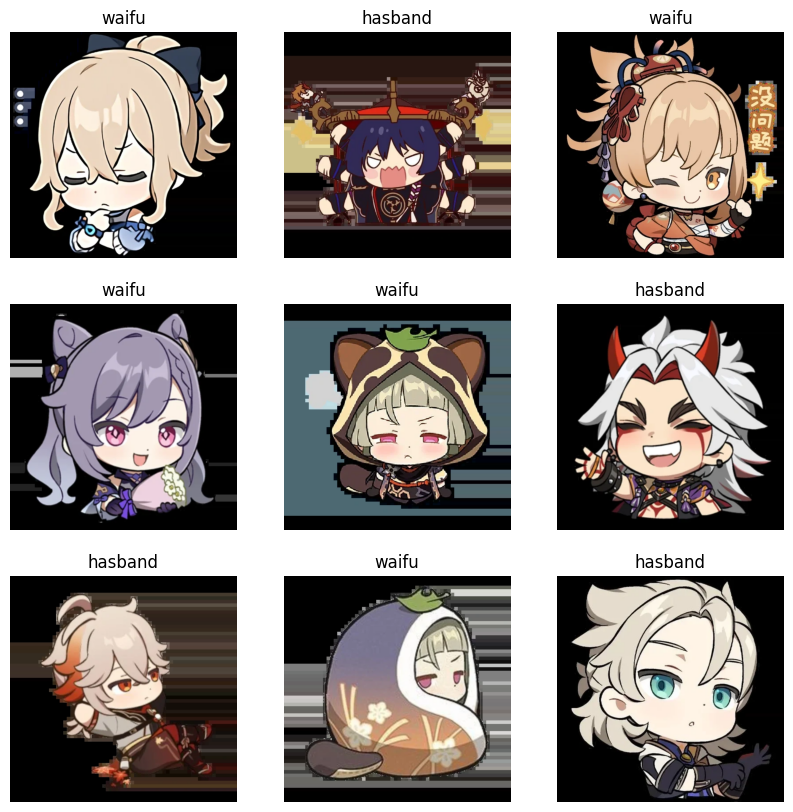

In [372]:



# for image_batch, labels_batch in train_ds:
#   print(image_batch.shape)
#   print(labels_batch.shape)
#   break

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [373]:
from tensorflow.keras import regularizers
AUTOTUNE = tf.data.AUTOTUNE

from tensorflow.keras.optimizers.legacy import Adam

num_classes = 3
# print(num_classes)

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


def get_model():
    model = Sequential([
        layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(256, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.02)),
        layers.Dropout(0,2),
        layers.Dense(num_classes, kernel_regularizer=regularizers.l2(0.01))])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    return model

In [374]:
model = get_model()
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_25 (Rescaling)    (None, 512, 512, 3)       0         
                                                                 
 conv2d_83 (Conv2D)          (None, 512, 512, 16)      448       
                                                                 
 max_pooling2d_83 (MaxPooli  (None, 256, 256, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_84 (Conv2D)          (None, 256, 256, 32)      4640      
                                                                 
 max_pooling2d_84 (MaxPooli  (None, 128, 128, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_85 (Conv2D)          (None, 128, 128, 64)    

In [375]:
epochs=100
print(train_ds)
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Epoch 1/100
13/13 [==============================] - 26s 2s/step - loss: 160.1551 - accuracy: 0.5522 - val_loss: 76.3170 - val_accuracy: 0.6122
Epoch 2/100
13/13 [==============================] - 21s 2s/step - loss: 47.2799 - accuracy: 0.5954 - val_loss: 29.3414 - val_accuracy: 0.6122
Epoch 3/100
13/13 [==============================] - 19s 1s/step - loss: 22.4321 - accuracy: 0.6081 - val_loss: 17.3998 - val_accuracy: 0.6122
Epoch 4/100
13/13 [==============================] - 18s 1s/step - loss: 15.2033 - accuracy: 0.6107 - val_loss: 13.7530 - val_accuracy: 0.6122
Epoch 5/100
13/13 [==============================] - 18s 1s/step - loss: 13.0509 - accuracy: 0.5954 - val_loss: 12.9969 - val_accuracy: 0.6122
Epoch 6/100
13/13 [==============================] - 16s 1s/step - loss: 12.2939 - accuracy: 0.6132 - val_loss: 11.9444 - val_acc

range(0, 100)


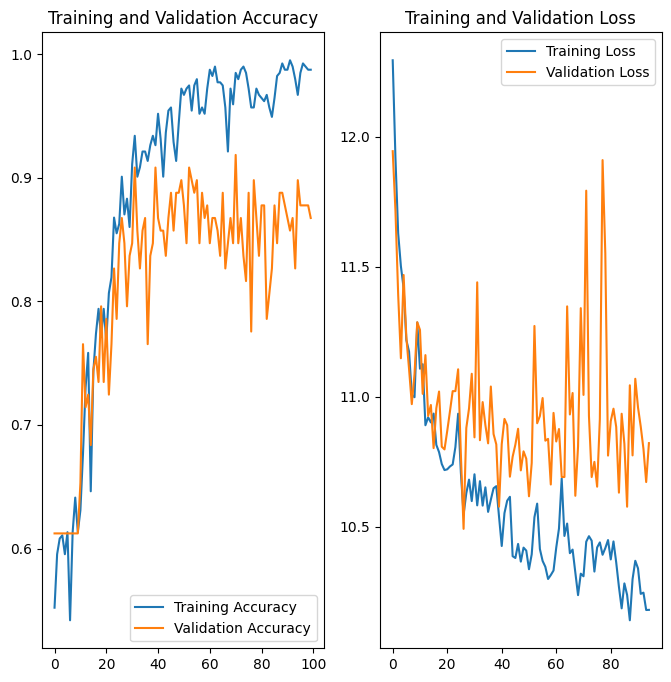

In [376]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

last = epochs - 5

loss = history.history['loss'][-last:]
val_loss = history.history['val_loss'][-last:]


epochs_range = range(epochs)
print(epochs_range)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(last), loss, label='Training Loss')
plt.plot(range(last), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [377]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  "data/parsed_genshin_pics/test",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 122 files belonging to 3 classes.


4/4 [==============================] - 2s 327ms/step - loss: 11.2035 - accuracy: 0.8525
Loss: 11.203453063964844
Accuracy: 0.8524590134620667
1/1 [==============================] - 0s 457ms/step - loss: 11.4058 - accuracy: 0.8438
[11.405789375305176, 0.84375]
[[ 8.86428738e+00 -7.70395279e+00 -3.35172772e+00]
 [ 6.46316385e+00 -1.10197163e+01  2.09657001e+00]
 [-5.13912857e-01  1.97678137e+00 -5.93797624e-01]
 [-5.88639021e+00 -9.67118359e+00  1.57913847e+01]
 [-3.14878178e+00 -4.04155827e+00  7.85620928e+00]
 [-4.74572808e-01  2.98947740e+00 -2.37359595e+00]
 [-1.34349597e+00 -1.09387875e+01  1.14165964e+01]
 [ 3.71047929e-02 -1.03400249e+01  9.38244438e+00]
 [-1.21910107e+00 -1.05422945e+01  1.12947721e+01]
 [ 6.02302265e+00 -1.29070492e+01  3.91699052e+00]
 [-1.55379877e+01 -1.92937737e+01  3.76962776e+01]
 [-9.41767025e+00 -9.01802254e+00  2.04325466e+01]
 [ 3.57557207e-01 -1.22142506e+00  1.78304285e-01]
 [-5.77882290e+00 -1.24379101e+01  2.18782043e+01]
 [-2.92866886e-01 -8.67382

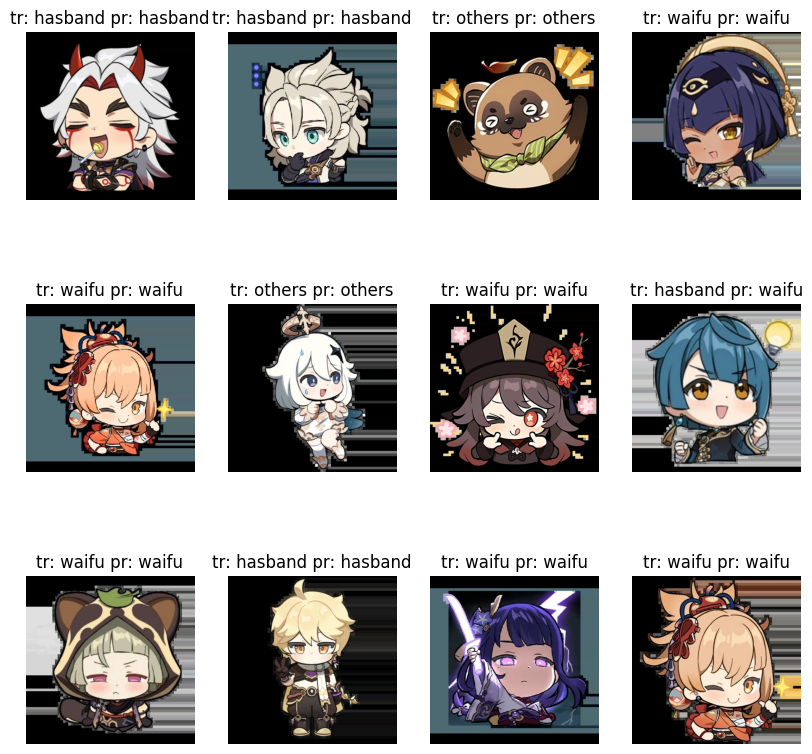

In [378]:
def get_class(prob):
    this_class = np.argmax(prob)
    if this_class == 1:
        return "others"
    if this_class == 2:
        return "waifu"
    if this_class == 0:
        return "hasband"
    return "undefind"

results = model.evaluate(test_ds)

print("Loss:", results[0])
print("Accuracy:", results[1])

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    loss = model.evaluate(images, labels)
    # print(loss)
    # print(predictions)
    # print(images.shape)
    # print(labels.shape)
    
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("tr: " + class_names[labels[i]] + " " + "pr: " + get_class(predictions[i]))
        plt.axis("off")